### Importação dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [7]:
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()
print(f"O faturamento total da loja 1 é: R$ {faturamento_loja1:.2f}")
print(f"O faturamento total da loja 2 é: R$ {faturamento_loja2:.2f}")
print(f"O faturamento total da loja 3 é: R$ {faturamento_loja3:.2f}")
print(f"O faturamento total da loja 4 é: R$ {faturamento_loja4:.2f}")


O faturamento total da loja 1 é: R$ 1534509.12
O faturamento total da loja 2 é: R$ 1488459.06
O faturamento total da loja 3 é: R$ 1464025.03
O faturamento total da loja 4 é: R$ 1384497.58


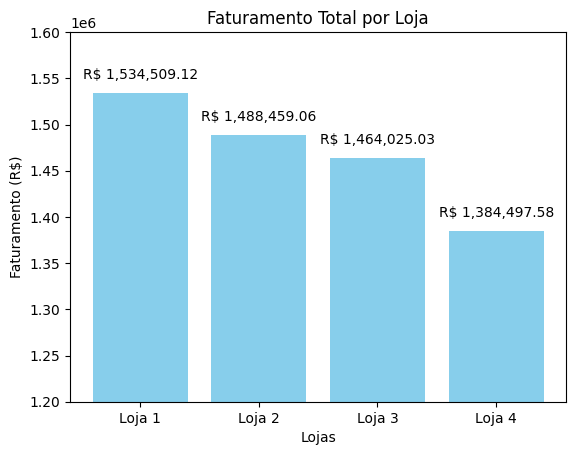

In [8]:
import matplotlib.pyplot as plt

# Nomes das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Faturamentos (use as variáveis que você calculou)
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criar o gráfico de barras
plt.bar(lojas, faturamentos, color='skyblue')
plt.ylim(1200000, 1600000)

# Adicionar título e rótulos
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Mostrar valores acima das barras
for i, v in enumerate(faturamentos):
    plt.text(i, v + max(faturamentos)*0.01, f'R$ {v:,.2f}', ha='center')

plt.show()


# 2. Vendas por Categoria


In [9]:
vendas_categoria_loja1 = loja.groupby("Categoria do Produto")["Produto"].count()
vendas_categoria_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count()
vendas_categoria_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count()
vendas_categoria_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count()
print("Vendas por categoria - Loja 1:")
print(vendas_categoria_loja1)
print("\nVendas por categoria - Loja 2:")
print(vendas_categoria_loja2)
print("\nVendas por categoria - Loja 3:")
print(vendas_categoria_loja3)
print("\nVendas por categoria - Loja 4:")
print(vendas_categoria_loja4)

Vendas por categoria - Loja 1:
Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
Name: Produto, dtype: int64

Vendas por categoria - Loja 2:
Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
Name: Produto, dtype: int64

Vendas por categoria - Loja 3:
Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177
Name: Produto, dtype: int64

Vendas por categoria - Loja 4:
Categoria do Produto
brinquedo

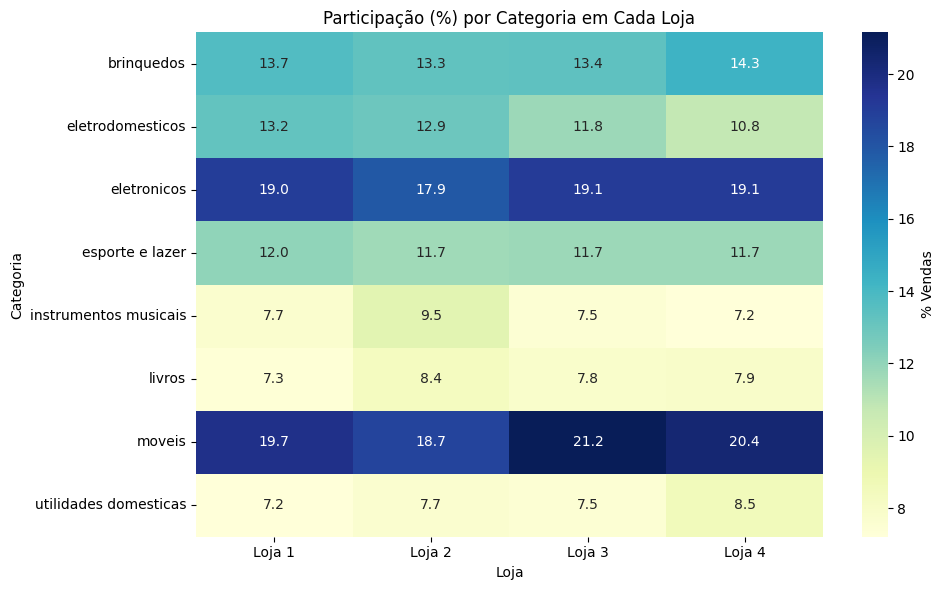

In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cria um DataFrame com porcentagens de vendas por categoria
df_percentual = pd.DataFrame({
    "Loja 1": loja["Categoria do Produto"].value_counts(normalize=True) * 100,
    "Loja 2": loja2["Categoria do Produto"].value_counts(normalize=True) * 100,
    "Loja 3": loja3["Categoria do Produto"].value_counts(normalize=True) * 100,
    "Loja 4": loja4["Categoria do Produto"].value_counts(normalize=True) * 100
}).fillna(0)

# Reordena para garantir mesmo alinhamento de categorias
df_percentual = df_percentual.reindex(sorted(df_percentual.index))

# Plota o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_percentual, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% Vendas'})
plt.title("Participação (%) por Categoria em Cada Loja")
plt.ylabel("Categoria")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [11]:
avaliacao_media_loja1 = loja["Avaliação da compra"].mean()
avaliacao_media_loja2 = loja2["Avaliação da compra"].mean()
avaliacao_media_loja3 = loja3["Avaliação da compra"].mean()
avaliacao_media_loja4 = loja4["Avaliação da compra"].mean()
print(f"Avaliação média da Loja 1: {avaliacao_media_loja1:.2f}")
print(f"Avaliação média da Loja 2: {avaliacao_media_loja2:.2f}")
print(f"Avaliação média da Loja 3: {avaliacao_media_loja3:.2f}")
print(f"Avaliação média da Loja 4: {avaliacao_media_loja4:.2f}")

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


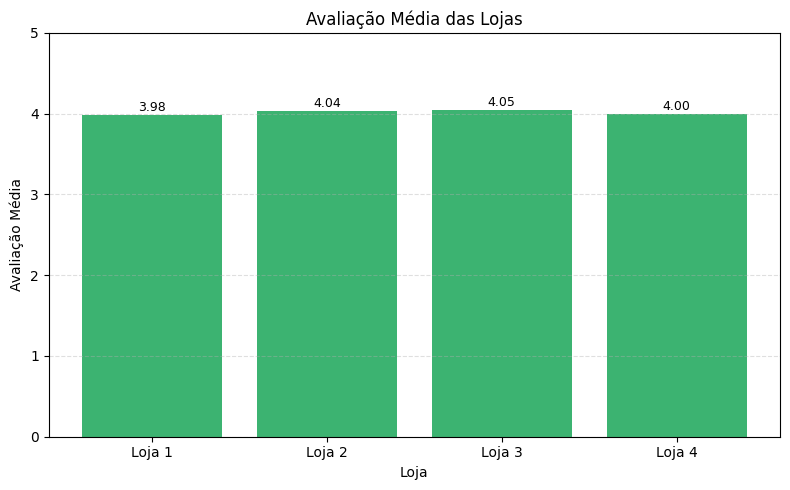

In [12]:
# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [avaliacao_media_loja1, avaliacao_media_loja2, avaliacao_media_loja3, avaliacao_media_loja4]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(lojas, avaliacoes, color='mediumseagreen')
plt.title('Avaliação Média das Lojas')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5)  # Avaliações geralmente são de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adiciona rótulos de valor nas barras
for i, v in enumerate(avaliacoes):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [13]:
vendas_produto_loja1 = loja["Produto"].value_counts()
mais_vendido_loja1 = vendas_produto_loja1.idxmax()
quantidade_mais_vendido = vendas_produto_loja1.max()

menos_vendido_loja1 = vendas_produto_loja1.idxmin()
quantidade_menos_vendido = vendas_produto_loja1.min()

print(f"Produto mais vendido da loja 1: {mais_vendido_loja1} ({quantidade_mais_vendido} vendas)")
print(f"Produto menos vendido da loja 1: {menos_vendido_loja1} ({quantidade_menos_vendido} vendas)")

vendas_produto_loja2 = loja2["Produto"].value_counts()
mais_vendido_loja2 = vendas_produto_loja2.idxmax()
quantidade_mais_vendido = vendas_produto_loja2.max()

menos_vendido_loja2 = vendas_produto_loja2.idxmin()
quantidade_menos_vendido = vendas_produto_loja2.min()

print(f"Produto mais vendido da loja 2: {mais_vendido_loja2} ({quantidade_mais_vendido} vendas)")
print(f"Produto menos vendido da loja 2: {menos_vendido_loja2} ({quantidade_menos_vendido} vendas)")

vendas_produto_loja3 = loja3["Produto"].value_counts()
mais_vendido_loja3 = vendas_produto_loja3.idxmax()
quantidade_mais_vendido = vendas_produto_loja3.max()

menos_vendido_loja3 = vendas_produto_loja3.idxmin()
quantidade_menos_vendido = vendas_produto_loja3.min()

print(f"Produto mais vendido da loja 3: {mais_vendido_loja3} ({quantidade_mais_vendido} vendas)")
print(f"Produto menos vendido da loja 3: {menos_vendido_loja3} ({quantidade_menos_vendido} vendas)")

vendas_produto_loja4 = loja4["Produto"].value_counts()
mais_vendido_loja4 = vendas_produto_loja4.idxmax()
quantidade_mais_vendido = vendas_produto_loja4.max()

menos_vendido_loja4 = vendas_produto_loja4.idxmin()
quantidade_menos_vendido = vendas_produto_loja4.min()

print(f"Produto mais vendido da loja 4: {mais_vendido_loja4} ({quantidade_mais_vendido} vendas)")
print(f"Produto menos vendido da loja 4: {menos_vendido_loja4} ({quantidade_menos_vendido} vendas)")

Produto mais vendido da loja 1: Micro-ondas (60 vendas)
Produto menos vendido da loja 1: Headset (33 vendas)
Produto mais vendido da loja 2: Iniciando em programação (65 vendas)
Produto menos vendido da loja 2: Jogo de tabuleiro (32 vendas)
Produto mais vendido da loja 3: Kit banquetas (57 vendas)
Produto menos vendido da loja 3: Blocos de montar (35 vendas)
Produto mais vendido da loja 4: Cama box (62 vendas)
Produto menos vendido da loja 4: Guitarra (33 vendas)


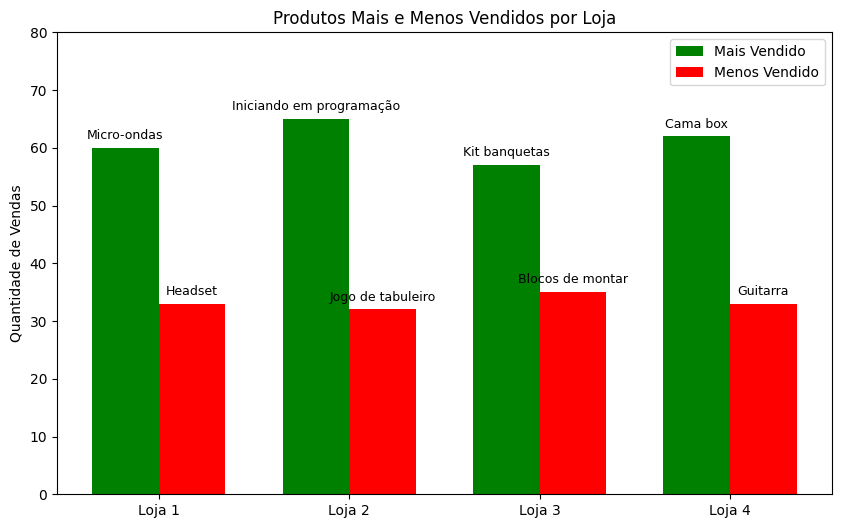

In [14]:
# Produtos mais vendidos e quantidades
produtos_mais_vendidos = [
    mais_vendido_loja1,
    mais_vendido_loja2,
    mais_vendido_loja3,
    mais_vendido_loja4,
]

quantidades_mais_vendidas = [
    vendas_produto_loja1.max(),
    vendas_produto_loja2.max(),
    vendas_produto_loja3.max(),
    vendas_produto_loja4.max(),
]

# Produtos menos vendidos e quantidades
produtos_menos_vendidos = [
    menos_vendido_loja1,
    menos_vendido_loja2,
    menos_vendido_loja3,
    menos_vendido_loja4,
]

quantidades_menos_vendidas = [
    vendas_produto_loja1.min(),
    vendas_produto_loja2.min(),
    vendas_produto_loja3.min(),
    vendas_produto_loja4.min(),
]

# Nomes das lojas para o eixo x
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

x = range(len(lojas))  # posições no eixo x

largura = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10,6))

# Barras dos mais vendidos (à esquerda)
ax.bar([i - largura/2 for i in x], quantidades_mais_vendidas, largura,
       label='Mais Vendido', color='green')

# Barras dos menos vendidos (à direita)
ax.bar([i + largura/2 for i in x], quantidades_menos_vendidas, largura,
       label='Menos Vendido', color='red')

# Nomes das lojas no eixo x
ax.set_xticks(x)
ax.set_xticklabels(lojas)

ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Produtos Mais e Menos Vendidos por Loja')

ax.legend()
plt.ylim(0, 80)

# Mostrar os nomes dos produtos acima das barras
for i in x:
    ax.text(i - largura/2, quantidades_mais_vendidas[i] + 1,
            produtos_mais_vendidos[i], ha='center', va='bottom', fontsize=9)
    ax.text(i + largura/2, quantidades_menos_vendidas[i] + 1,
            produtos_menos_vendidos[i], ha='center', va='bottom', fontsize=9)

plt.show()


# 5. Frete Médio por Loja


In [15]:
frete_media_loja1 = loja["Frete"].mean()
frete_media_loja2 = loja2["Frete"].mean()
frete_media_loja3 = loja3["Frete"].mean()
frete_media_loja4 = loja4["Frete"].mean()
print(f"Frete médio da Loja 1: R$ {frete_media_loja1:.2f}")
print(f"Frete médio da Loja 2: R$ {frete_media_loja2:.2f}")
print(f"Frete médio da Loja 3: R$ {frete_media_loja3:.2f}")
print(f"Frete médio da Loja 4: R$ {frete_media_loja4:.2f}")

Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


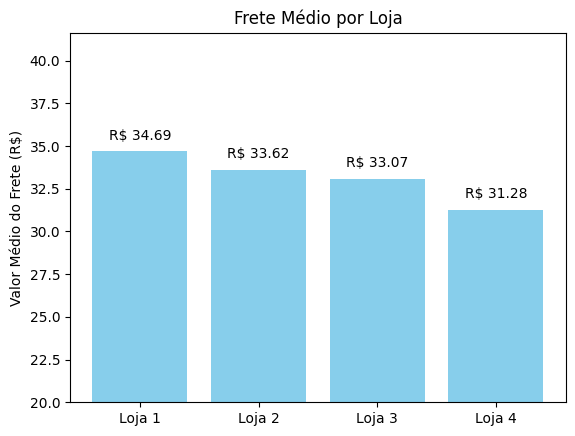

In [16]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_medios = [frete_media_loja1, frete_media_loja2, frete_media_loja3, frete_media_loja4]

plt.bar(lojas, fretes_medios, color='skyblue')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.ylim(20, max(fretes_medios)*1.2)

# Adiciona o valor acima das barras
for i, valor in enumerate(fretes_medios):
    plt.text(i, valor + max(fretes_medios)*0.02, f'R$ {valor:.2f}', ha='center')

plt.show()


# 6. Análise de desempenho geográfico

In [51]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Junta os dados das 4 lojas num DataFrame só
dados_todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Extrai as coordenadas para o heatmap (lista de [lat, lon])
heat_data = dados_todas_lojas[['lat', 'lon']].values.tolist()

# Centraliza o mapa na média das lat/lon
lat_centro = dados_todas_lojas["lat"].mean()
lon_centro = dados_todas_lojas["lon"].mean()

mapa_heat = folium.Map(location=[lat_centro, lon_centro], zoom_start=10)

# Adiciona o heatmap
HeatMap(heat_data).add_to(mapa_heat)

# Exibe o mapa
mapa_heat


# Relatório Final

# Introdução
O objetivo deste relatório é avaliar o desempenho de quatro lojas e auxiliar o Sr. João na decisão de qual delas vender. Foram efetuadas análises que serão demonstradas nos tópicos abaixo, que foram base de apoio para a análise que segue com visualizações gráficas e informativas sobre a extração dos dados.

# Faturamento total:

Com base nos dados analisados, a Loja 4 apresentou menor faturamento. ficando 150 mil reais abaixo da primeira colocada.

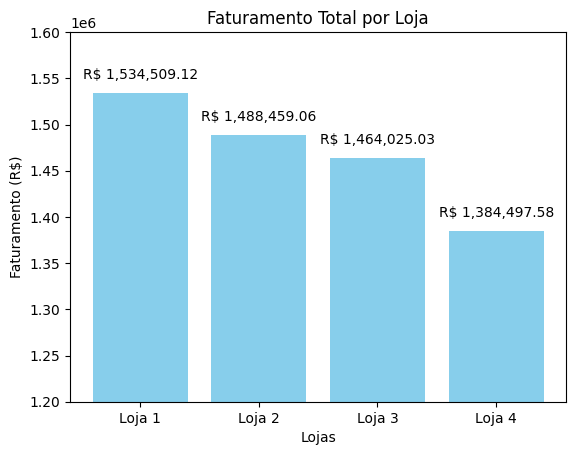

# Categoria de Produtos Mais e Menos vendidas

Apesar de apresentar bom desempenho em categorias como brinquedos e utilidades domésticas, a Loja 4 possui desempenho inferior nas categorias de maior valor agregado, como eletrodomésticos e instrumentos musicais, o que pode impactar negativamente seu faturamento total.

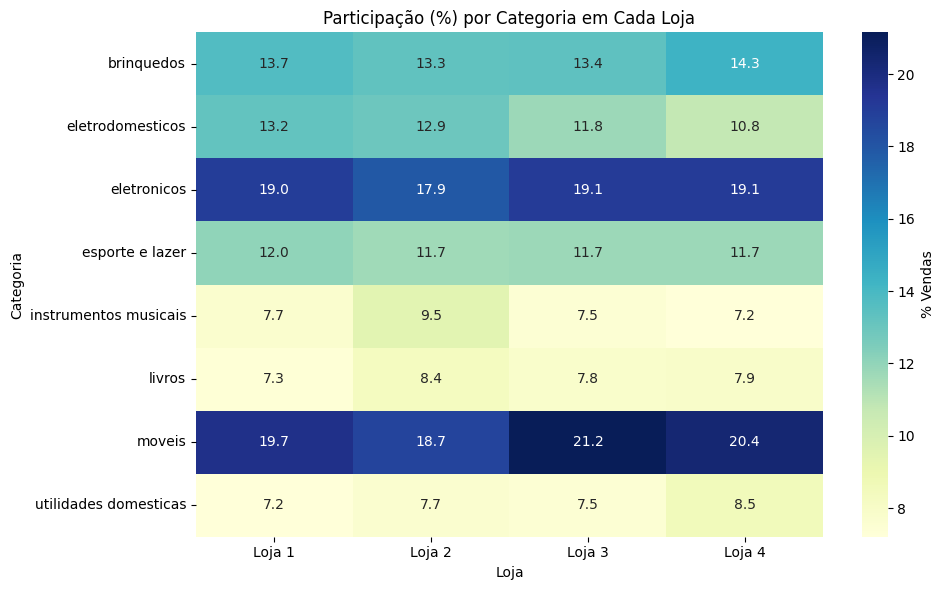

# Média das avaliações dos clientes

A Loja 4 apresentou a segunda pior média de avaliações entre todas as lojas, ficando abaixo apenas da Loja 1, que, por sua vez, lidera em vendas e faturamento. Inicialmente, poderíamos supor que a menor média estaria ligada ao menor volume de vendas, mas a Loja 4 possui um total de vendas praticamente igual ao da Loja 1.

No entanto, ao observar o perfil das categorias mais vendidas na Loja 4, nota-se uma concentração maior em brinquedos, móveis e utilidades domésticas. Esses tipos de produtos, muitas vezes, estão sujeitos a maior variabilidade na qualidade percebida pelo cliente, além de fatores como durabilidade, montagem ou expectativa em relação ao produto, o que pode impactar negativamente na nota atribuída.

Isso sugere que a baixa avaliação pode estar mais relacionada ao tipo de produto vendido do que ao volume de vendas ou à qualidade do atendimento em si.

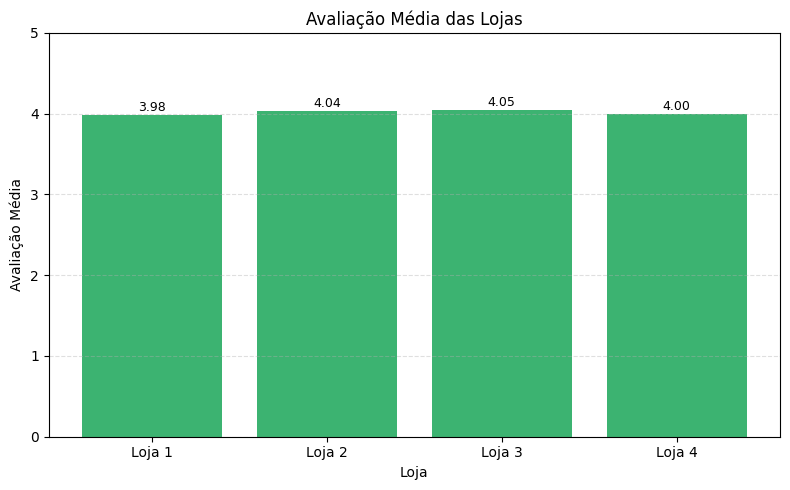

# Produtos Mais e Menos Vendidos

Analisando os dados, vemos que os produtos mais vendidos nas quatro lojas estão nas categorias de eletrônicos e móveis, o que mostra que esses itens têm maior saída no geral.

Na Loja 4, o produto mais vendido foi da categoria eletrônicos (451 vendas), enquanto o menos vendido foi de instrumentos musicais (170 vendas). Isso acompanha a tendência geral das demais lojas, onde livros e instrumentos também vendem pouco.

Apesar disso, a Loja 4 não se destaca em nenhum produto específico, o que pode indicar menor apelo comercial. Além disso, tem desempenho fraco em categorias mais específicas, como instrumentos musicais, o que pode dificultar sua diferenciação no mercado.

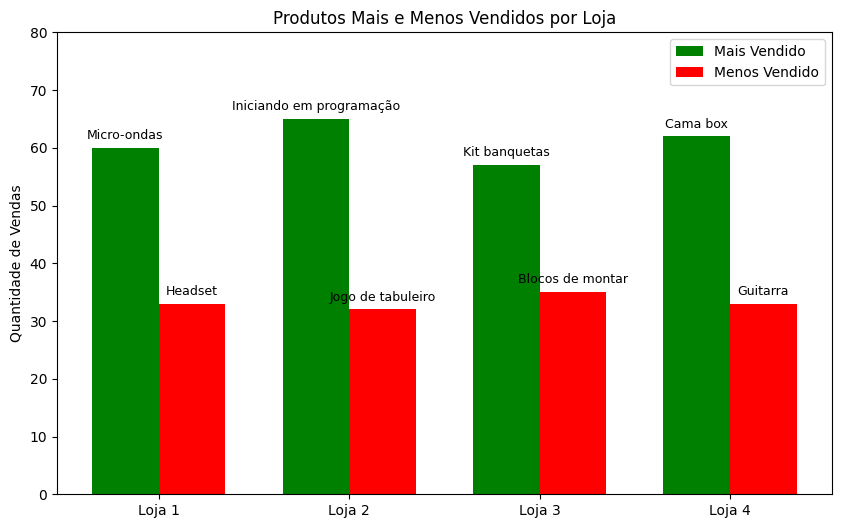

# Frete Médio por Loja

A análise dos valores de frete revelou que a Loja 1 possui o maior frete médio, com R$ 34,69, seguida pelas Lojas 2 (R$ 33,62) e 3 (R$ 33,07). A Loja 4 apresenta o menor frete médio, com R$ 31,28.

Apesar do menor valor de frete, a Loja 4 não se destaca em desempenho geral, o que indica que o custo de entrega não está sendo um diferencial suficiente para melhorar suas vendas ou avaliações. Isso pode indicar que outros fatores, como a qualidade dos produtos ou atendimento, têm mais peso na percepção dos clientes.

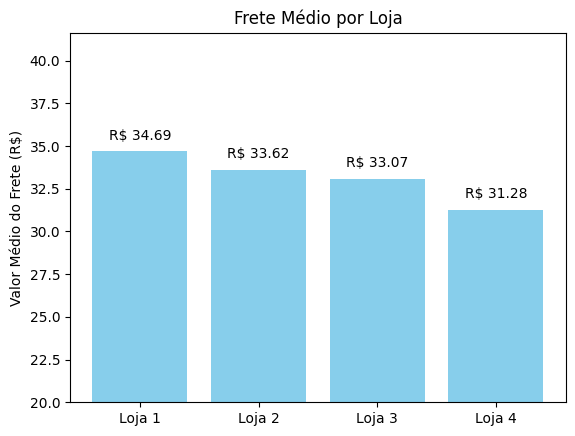

# Conclusão

Após a análise detalhada de todos os dados disponíveis, conclui-se que a Loja 4 é a candidata mais adequada para ser vendida pelo Sr. João. Embora essa unidade apresente o menor frete médio, esse fator não compensou seu baixo desempenho de vendas totais e faturamento, que ficaram significativamente atrás das demais lojas.

Além disso, a Loja 4 registrou uma das piores médias de avaliação dos clientes, mesmo com um volume de vendas semelhante ao da Loja 1, o que pode indicar problemas de qualidade nos produtos ou na experiência do cliente. A categoria de produtos mais vendida na Loja 4 inclui itens como brinquedos, móveis e utilidades domésticas, que podem estar mais sujeitos a avaliações negativas por questões de durabilidade ou expectativas não atendidas.

No comparativo de categorias e produtos mais vendidos, as diferenças entre as lojas foram sutis, indicando que nenhuma delas se destaca fortemente em um nicho específico. No entanto, quando todos os indicadores são considerados em conjunto — como faturamento, avaliação, mix de produtos e frete — a Loja 4 demonstra menor performance e menor potencial de crescimento, tornando-se a escolha mais estratégica para desinvestimento.